# Part I: Analysis and Characterization of surface waters in South Africa

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Math, Latex
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#warnings
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import altair as alt

In [2]:
# Load the complete file created in the previous Notebook:
chemical_stations=pd.read_excel("chemical_WQI_ICI_stations.xlsx")
chemical_stations.head()

,POINT ID,DATE,River/Lake/Dam,Locality Description of Sample Station,Latitude (degrees),Longitude (degrees),Number Samples,Subdrainage Region,Drainage Region,YEAR,EC (μS/cm),PH,TDS (mg/L),Na (mg/L),Mg (mg/L),Ca (mg/L),F (mg/L),Cl (mg/L),NO2+NO3 (mg/L),SO4 (mg/L),PO4 (mg/L),TAL (CaCO3) (mg/L),Si (mg/L),K (mg/L),NH4 (mg/L),[Na] (mmol/L),[Mg] (mmol/L),[Ca] (mmol/L),[F] (mmol/L),[Cl] (mmol/L),[NO3] (mmol/L),[SO4] (mmol/L),[PO4] (mmol/L),[Si] (mmol/L),[K] (mmol/L),[NH4] (mmol/L),[TAL] (mmol/L),[HCO3] (mmol/L),[CO3] (mmol/L),2[SO4],[Cl],SAR,HCO3 (mg/L),WQI,Class WQI,ICI (%),Class ICI,Class SAR
0,90160,1976-04-20,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,366.0,7.83,267.0,24.1,18.2,22.0,0.57,19.7,0.04,19.6,0.014,130.7,4.33,3.47,0.01,1.047826,0.748971,0.548628,0.030000,0.554930,0.000645,0.203954,0.000147,0.154093,0.088747,0.000556,1.307,2.596404,0.008798,11.404165,15.514532,0.919854,158.380632,33.716337,Excellent,27.074050,Rock dominance,Very good water quality
1,90160,1976-04-27,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,380.0,7.78,280.0,25.6,19.2,22.8,0.57,19.0,0.04,20.4,0.004,138.3,4.06,3.54,0.02,1.113043,0.790123,0.568579,0.030000,0.535211,0.000645,0.212279,0.000042,0.144484,0.090537,0.001111,1.383,2.749393,0.008303,11.395173,14.365124,0.954883,167.712993,34.836136,Excellent,25.891041,Rock dominance,Very good water quality
2,90160,1976-05-18,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,372.0,7.48,269.0,22.8,17.2,23.9,0.44,18.8,0.29,17.9,0.007,134.3,5.59,2.91,0.08,0.991304,0.707819,0.596010,0.023158,0.529577,0.004677,0.186264,0.000074,0.198932,0.074425,0.004444,1.343,2.677893,0.004053,10.382320,14.759249,0.868154,163.351497,31.462083,Excellent,25.300708,Rock dominance,Very good water quality
3,90160,1976-05-25,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,367.0,7.43,269.0,22.9,17.9,23.8,0.48,19.4,0.39,18.1,0.004,132.7,5.46,3.03,0.08,0.995652,0.736626,0.593516,0.025263,0.546479,0.006290,0.188345,0.000042,0.194306,0.077494,0.004444,1.327,2.646859,0.003571,10.530419,15.276851,0.863294,161.458381,32.372463,Excellent,25.991911,Rock dominance,Very good water quality
4,90160,1976-06-01,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,383.0,7.34,279.0,24.3,18.5,24.5,0.53,19.9,0.56,18.1,0.007,137.6,5.13,3.03,0.10,1.056522,0.761317,0.610973,0.027895,0.560563,0.009032,0.188345,0.000074,0.182562,0.077494,0.005556,1.376,2.745978,0.003011,10.210491,15.194491,0.901894,167.504656,34.027075,Excellent,25.633347,Rock dominance,Very good water quality


### Temporal and spatial bias

Distribution of samples by year and by regions:

In [4]:
# Group samples by year:
samples_year=chemical_stations.groupby("YEAR")["YEAR"].count()
print(samples_year.sort_values(ascending=False))
# Group samples by regions:
samples_region=chemical_stations.groupby("Drainage Region")["Drainage Region"].count()
print(samples_region.sort_values(ascending=False))

YEAR
1999    9946
2001    9409
2000    8410
1997    8348
1998    7879
1996    7873
2005    7499
2007    7427
1995    7400
2002    7339
1989    7307
2006    7280
1994    7269
2004    7170
2003    6744
1993    6679
1988    6320
1992    6041
1987    5793
1990    5650
1986    5335
1991    4551
1981    4424
1980    4269
1977    4189
1985    4145
1982    3757
1983    3355
1978    3328
1984    2993
2008    2496
1976    1815
2010    1607
1979    1459
2011    1388
2009     241
Name: YEAR, dtype: int64
Drainage Region
C    69674
A    46964
B    25056
H     8544
D     7536
G     7496
Q     6817
J     4832
X     3020
W     2905
R     2572
N     2458
S     1642
P     1639
L     1585
K     1464
V     1340
U      523
E      424
M      345
T      299
Name: Drainage Region, dtype: int64


There are many more samples measured before 2005, after which they decrease considerably. Similarly, the largest number of samples are collected at stations A, B and C.

Text(0.5, 1.0, 'Number of samples per Region')

<Figure size 432x288 with 0 Axes>

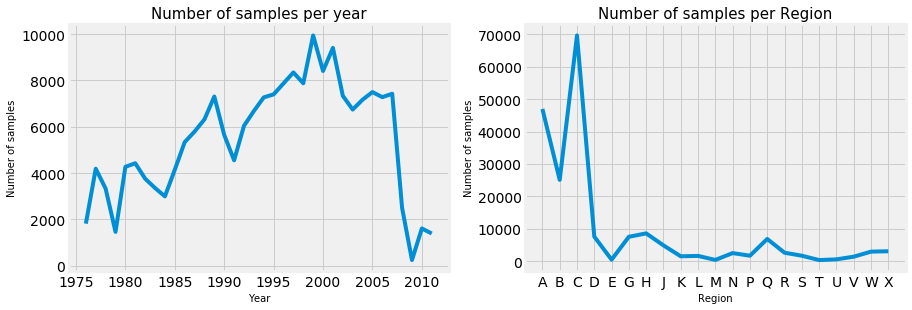

In [5]:
fig = plt.figure()
plt.figure(figsize=(15,10))
plt.style.use('fivethirtyeight')

# Número de muestras por año
plt.subplot2grid((2,2), (0,0))
plt.plot(samples_year)
plt.xlabel("Year", size=10)
plt.ylabel("Number of samples", size=10)
plt.title("Number of samples per year", size=15)

# Número de muestras por región 
plt.subplot2grid((2,2), (0,1))
plt.plot(samples_region)
plt.xlabel("Region", size=10)
plt.ylabel("Number of samples", size=10)
plt.title("Number of samples per Region", size=15)

## Statistical tables of the WQI and ICI

### WQI statistical table

In [6]:
# Number of samples from each WQI group
chemical_stations.groupby("Class WQI")["Class WQI"].count()

Class WQI
Excellent     123147
Good           52016
Poor           14585
Unsuitable      2975
Very Poor       4412
Name: Class WQI, dtype: int64

In [7]:
# Create the classification groups:
Excellent=chemical_stations[(chemical_stations["WQI"]<=50)]
Good=chemical_stations[(chemical_stations["WQI"]>50) & (chemical_stations["WQI"]<=100)]
Poor=chemical_stations[(chemical_stations["WQI"]>100) & (chemical_stations["WQI"]<=200)]
Very_poor=chemical_stations[(chemical_stations["WQI"]>200) & (chemical_stations["WQI"]<=300)]
Unsuitable=chemical_stations[chemical_stations["WQI"]>300]

# Table with the statistical results of the WQI:
WQI_statistics=pd.DataFrame({"Water quality clasification": ["Excelent", "Good water", "Poor water",
                                                            "Very poor water", "Water unsuitable for drinking purpose"],
                             "Index Value": ["0-50","50-100","100-200","200-300",">300"],
                            "number of samples":[len(Excellent), len(Good),
                                                 len(Poor),len(Very_poor),len(Unsuitable)],
                            "%": [len(Excellent)*100/len(chemical_stations), len(Good)*100/len(chemical_stations),
                            len(Poor)*100/len(chemical_stations), len(Very_poor)*100/len(chemical_stations),
                             len(Unsuitable)*100/len(chemical_stations)]
                                                        }) 
WQI_statistics

,Water quality clasification,Index Value,number of samples,%
0,Excelent,0-50,123147,62.468359
1,Good water,50-100,52016,26.385979
2,Poor water,100-200,14585,7.398483
3,Very poor water,200-300,4412,2.238060
4,Water unsuitable for drinking purpose,>300,2975,1.509118


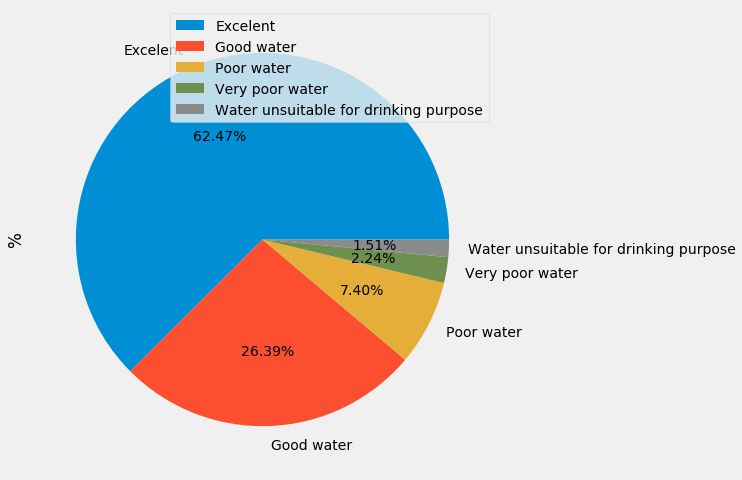

In [8]:
#Let's plot the results obtained
WQI_statistics.plot.pie(y='%', labels=WQI_statistics['Water quality clasification'], autopct = "%.2f%%", figsize=(8,8))

Surprisingly, the vast majority of samples have good quality, just over 11% of the samples have a WQI> 100.

### ICI statistical table

In [9]:
# Table with the statistical results of the ICI:
samples_ICI_less_30=chemical_stations[chemical_stations["ICI (%)"]<30]
samples_ICI_between_30_70=chemical_stations[(chemical_stations["ICI (%)"]>30) & (chemical_stations["ICI (%)"]<70)]
samples_ICI_more_70=chemical_stations[chemical_stations["ICI (%)"]>70]
ICI_statistics=pd.DataFrame({"ICI (%)": ["Rock dominance", "Mix", "Non-weathering dominated"],
                             "Number of samples":[len(samples_ICI_less_30),
                                                  len(samples_ICI_between_30_70),
                                                  len(samples_ICI_more_70) ],
                 "%": [len(samples_ICI_less_30)*100/len(chemical_stations),
                                     len(samples_ICI_between_30_70)*100/len(chemical_stations),
                                      len(samples_ICI_more_70)*100/len(chemical_stations)]
                                                      })
ICI_statistics

,ICI (%),Number of samples,%
0,Rock dominance,47911,24.303650
1,Mix,98827,50.131636
2,Non-weathering dominated,50397,25.564715


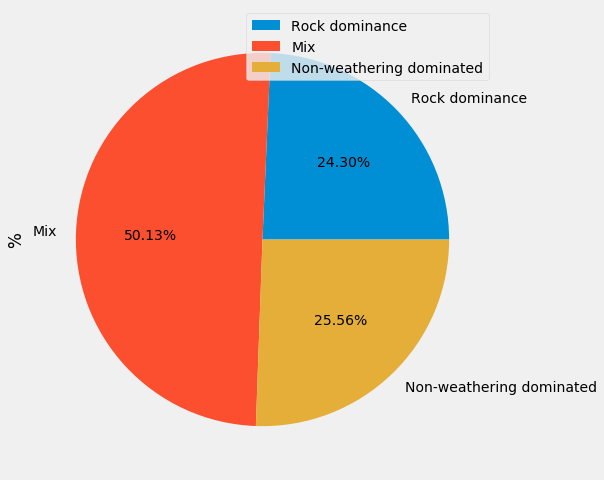

In [10]:
#Let's plot the results obtained:
ICI_statistics.plot.pie(y='%', labels=ICI_statistics['ICI (%)'], autopct = "%.2f%%", figsize=(8,8))

### Division of the regions according to their ICI

The primary catchment areas (A, B, C, ..., X) can be grouped into 3 different groups, according to the value of their division factor, which is given by the number of samples with ICI> = 70 divided by the number of samples with ICI <= 30.

If:

$\frac{ICI>=70%}{ICI<=30%}>2$ : Water chemistry is not controlled by chemical weathering

$0.5<\frac{ICI>=70%}{ICI<=30%}>2$: Water chemistry is controlled by chemical weathering and alternative sources

$\frac{ICI>=70%}{ICI<=30%}<0.5$: Water chemistry is controlled by chemical weathering

In [11]:
# Create a new column with these intervals:
limits=[0,30,70,100]
chemical_stations["ICI intervals"]=pd.cut(chemical_stations["ICI (%)"], limits)
chemical_stations.groupby("Drainage Region")["ICI intervals"].value_counts()

Drainage Region  ICI intervals
A                (30.0, 70.0]     36233
                 (0.0, 30.0]       9220
                 (70.0, 100.0]     1503
B                (30.0, 70.0]     10460
                 (0.0, 30.0]       8809
                 (70.0, 100.0]     5727
C                (30.0, 70.0]     32421
                 (0.0, 30.0]      20794
                 (70.0, 100.0]    16347
D                (0.0, 30.0]       4523
                 (30.0, 70.0]      2895
                 (70.0, 100.0]      118
E                (70.0, 100.0]      328
                 (30.0, 70.0]        59
                 (0.0, 30.0]         37
G                (70.0, 100.0]     6365
                 (30.0, 70.0]      1125
                 (0.0, 30.0]          5
H                (70.0, 100.0]     7913
                 (30.0, 70.0]       628
                 (0.0, 30.0]          3
J                (70.0, 100.0]     3038
                 (30.0, 70.0]      1533
                 (0.0, 30.0]        261
K        

In [12]:
# Calculate the Division Factor:
Regions_ICI_more_70=chemical_stations.groupby("Drainage Region")["ICI (%)"].apply(lambda x: (x>=70).sum())
Regions_ICI_less_30=chemical_stations.groupby("Drainage Region")["ICI (%)"].apply(lambda x: (x<=30).sum())
Regions_ICI_between_30_70=chemical_stations.groupby("Drainage Region")["ICI (%)"].apply(lambda x:((x>=30) & (x<=70)).sum())

# Division Factor:
Factor_ICI=Regions_ICI_more_70.divide(Regions_ICI_less_30)
Factor_ICI

Drainage Region
A       0.163883
B       0.656942
C       0.791526
D       0.026089
E       8.864865
G    1273.200000
H    2637.666667
J      11.639847
K            inf
L            inf
M            inf
N      48.281250
P            inf
Q       0.977049
R      31.000000
S       0.002081
T       0.004274
U       3.263158
V       0.154494
W       2.483333
X       0.002801
Name: ICI (%), dtype: float64

In [13]:
# Summary table of Division Factor:
table_ICI=pd.DataFrame({"Factor_ICI": Regions_ICI_more_70.divide(Regions_ICI_less_30)})

# Create the Division Factor classes:
col="Factor_ICI"
conditions=[table_ICI[col]>2,
            (table_ICI[col]>0.5) & (table_ICI[col]<2),
            table_ICI[col]<0.5]  
choices=["Non-weathering dominated", "Mix","Rock dominance"]
table_ICI["Class_ICI"]=np.select(conditions, choices, default=np.nan)
table_ICI.reset_index(inplace=True)
table_ICI

,Drainage Region,Factor_ICI,Class_ICI
0,A,0.163883,Rock dominance
1,B,0.656942,Mix
2,C,0.791526,Mix
3,D,0.026089,Rock dominance
4,E,8.864865,Non-weathering dominated
5,G,1273.200000,Non-weathering dominated
6,H,2637.666667,Non-weathering dominated
7,J,11.639847,Non-weathering dominated
8,K,inf,Non-weathering dominated
9,L,inf,Non-weathering dominated


In [14]:
# Obtain the regions classified by the value of the ICI
print(table_ICI[["Class_ICI", "Drainage Region"]].groupby("Class_ICI")["Drainage Region"].count())
table_ICI.groupby("Class_ICI")["Drainage Region"].unique()

Class_ICI
Mix                          3
Non-weathering dominated    12
Rock dominance               6
Name: Drainage Region, dtype: int64


Class_ICI
Mix                                                    [B, C, Q]
Non-weathering dominated    [E, G, H, J, K, L, M, N, P, R, U, W]
Rock dominance                                [A, D, S, T, V, X]
Name: Drainage Region, dtype: object

### SAR statistical table

In [15]:
# Number of samples from each WQI group
chemical_stations.groupby("Class SAR")["Class SAR"].count()

Class SAR
Fair water quality           9190
Good water quality          49631
Poor water quality           1318
Very good water quality    136996
Name: Class SAR, dtype: int64

In [16]:
# Create the classification groups:
Very_good=chemical_stations[(chemical_stations["SAR"]<=2)]
Good=chemical_stations[(chemical_stations["SAR"]>2) & (chemical_stations["WQI"]<8)]
Fair=chemical_stations[(chemical_stations["SAR"]>8) & (chemical_stations["SAR"]<=15)]
Poor=chemical_stations[(chemical_stations["SAR"]>15)]
                       
# Table with the statistical results of the SAR:
SAR_statistics=pd.DataFrame({"SAR clasification": ["Very Good water", "Good water", "Fair water",
                                                            "Poor water"],
                             "Index Value": ["0-2","2-8","8-15",">15"],
                            "number of samples":[len(Very_good), len(Good),
                                                 len(Fair),len(Poor)],
                            "%": [len(Very_good)*100/len(chemical_stations), len(Good)*100/len(chemical_stations),
                            len(Fair)*100/len(chemical_stations), len(Poor)*100/len(chemical_stations)
                             ]
                                                        }) 
SAR_statistics

,SAR clasification,Index Value,number of samples,%
0,Very Good water,0-2,136996,69.493494
1,Good water,2-8,13,0.006594
2,Fair water,8-15,9190,4.661780
3,Poor water,>15,1318,0.668577


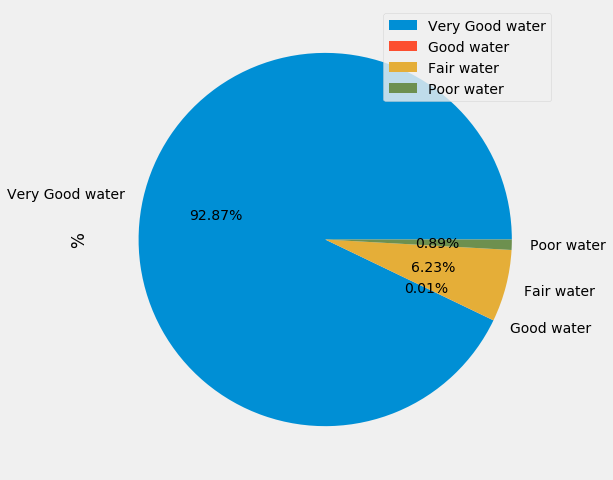

In [17]:
#Let's plot the results obtained:
SAR_statistics.plot.pie(y='%', labels=SAR_statistics['SAR clasification'], autopct = "%.2f%%", figsize=(8,8))

## Looking for relationships

See if the density plots are related to some parameters:

### Regions

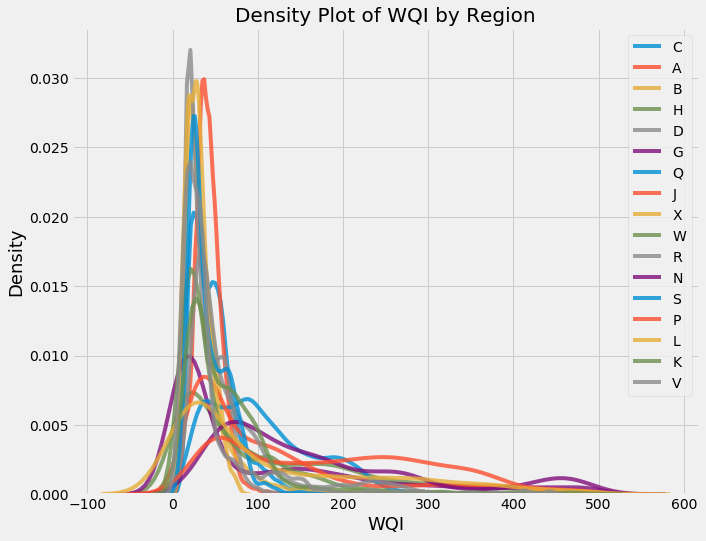

In [20]:
# Create a list of Regions with more than 1000 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Drainage Region'].value_counts()
types = list(types[types.values > 1000].index)
# Plot of distribution 
plt.subplots(figsize=(10, 8))
# Plot each region
for b_type in types:
    # Select the region
    subset = chemical_stations[chemical_stations['Drainage Region'] == b_type]
     # Density plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
# Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('Density Plot of WQI by Region', size = 20);

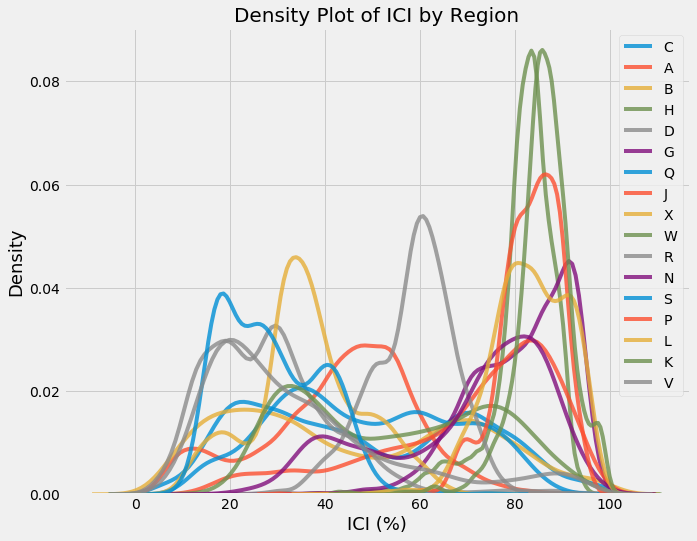

In [18]:
# Create a list of Regions with more than 1000 measurements
types =  chemical_stations.dropna(subset=['ICI (%)'])
types = types['Drainage Region'].value_counts()
types = list(types[types.values > 1000].index)
# Plot of distribution 
plt.subplots(figsize=(10, 8))
# Plot each region
for b_type in types:
    # Select the region
    subset = chemical_stations[chemical_stations['Drainage Region'] == b_type]
     # Density plot of ICI
    sns.kdeplot(subset['ICI (%)'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
# Label the plot
plt.xlabel('ICI (%)', size = 18); plt.ylabel('Density', size = 18); 
plt.title('Density Plot of ICI by Region', size = 20);

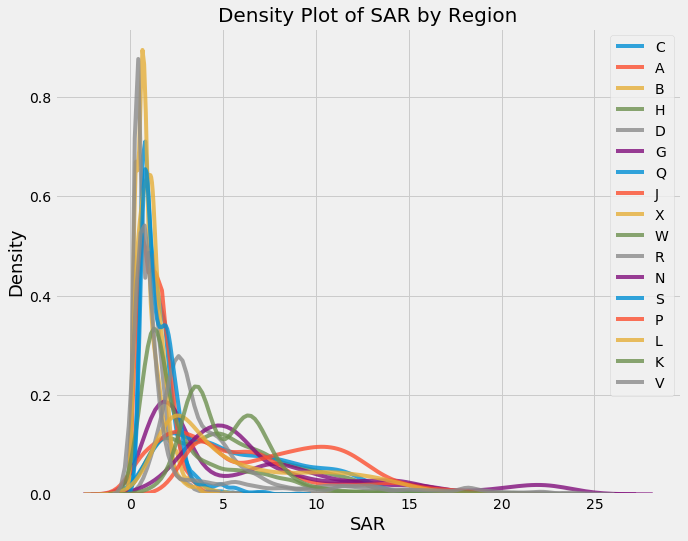

In [22]:
# Create a list of Regions with more than 1000 measurements
types =  chemical_stations.dropna(subset=['SAR'])
types = types['Drainage Region'].value_counts()
types = list(types[types.values > 1000].index)
# Plot of distribution 
plt.subplots(figsize=(10, 8))
# Plot each region
for b_type in types:
    # Select the region
    subset = chemical_stations[chemical_stations['Drainage Region'] == b_type]
     # Density plot of SAR
    sns.kdeplot(subset['SAR'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
# Label the plot
plt.xlabel('SAR', size = 18); plt.ylabel('Density', size = 18); 
plt.title('Density Plot of SAR by Region', size = 20);

The ICI is the parameter most affected of the 3 by the region.

### Sampling points

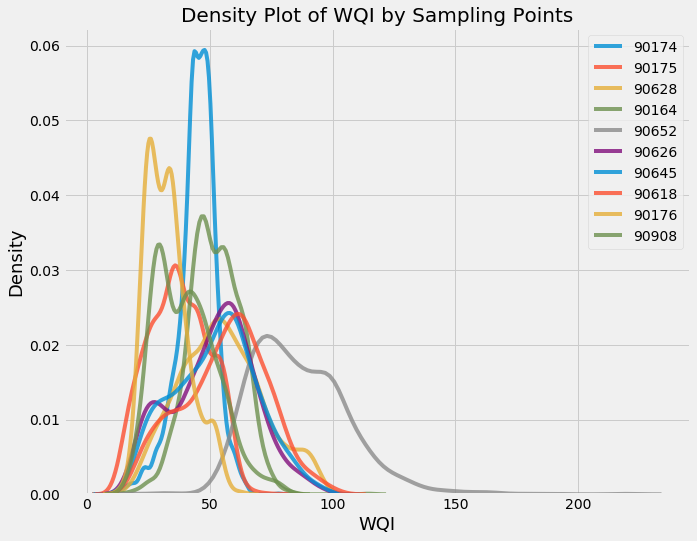

In [23]:
# Create a list of Regions with more than 1000 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['POINT ID'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution 
plt.subplots(figsize=(10, 8))
# Plot each sampling point
for b_type in types:
    # Select the sampling point
    subset = chemical_stations[chemical_stations['POINT ID'] == b_type]
     # Density plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
# Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('Density Plot of WQI by Sampling Points', size = 20);

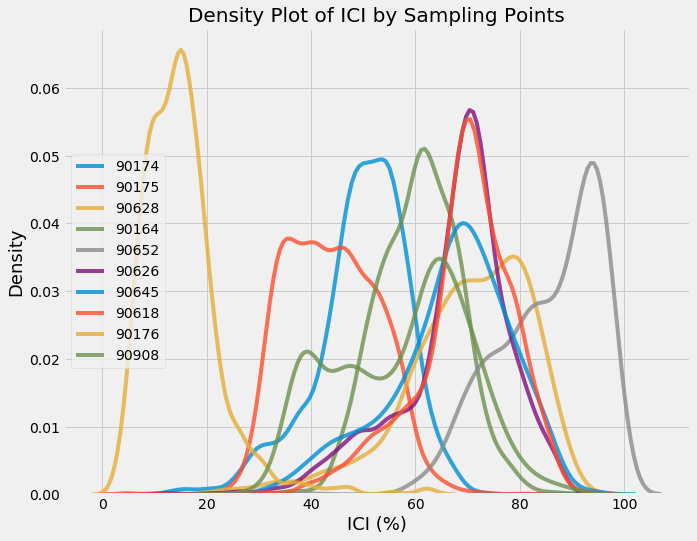

In [24]:
# Create a list of Regions with more than 1300 measurements
types =  chemical_stations.dropna(subset=['ICI (%)'])
types = types['POINT ID'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution 
plt.subplots(figsize=(10, 8))
# Plot each sampling point
for b_type in types:
    # Select the sampling point
    subset = chemical_stations[chemical_stations['POINT ID'] == b_type]
     # Density plot of ICI
    sns.kdeplot(subset['ICI (%)'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
# Label the plot
plt.xlabel('ICI (%)', size = 18); plt.ylabel('Density', size = 18); 
plt.title('Density Plot of ICI by Sampling Points', size = 20);

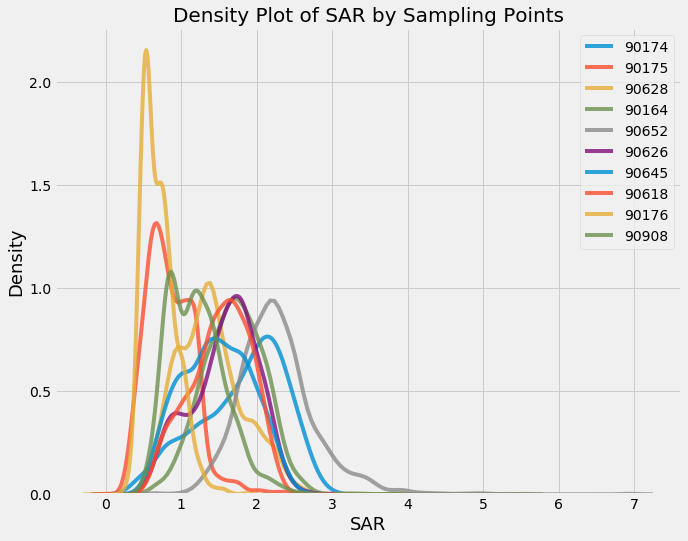

In [30]:
# Create a list of Regions with more than 1300 measurements
types =  chemical_stations.dropna(subset=['SAR'])
types = types['POINT ID'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution 
plt.subplots(figsize=(10, 8))
# Plot each sampling point
for b_type in types:
    # Select the sampling point
    subset = chemical_stations[chemical_stations['POINT ID'] == b_type]
     # Density plot of SAR
    sns.kdeplot(subset['SAR'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
# Label the plot
plt.xlabel('SAR', size = 18); plt.ylabel('Density', size = 18); 
plt.title('Density Plot of SAR by Sampling Points', size = 20);

The ICI is the parameter most affected of the 3 by the sampling point.

### Class WQI

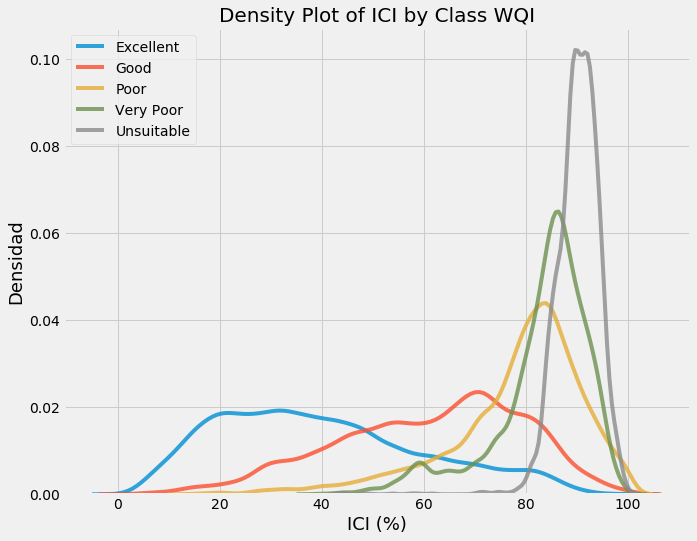

In [32]:
types =  chemical_stations.dropna(subset=['ICI (%)'])
types = types['Class WQI'].value_counts()
types = list(types.index)
# Plot of distribution 
plt.subplots(figsize=(10, 8))
# Plot each sampling point
for b_type in types:
    # Select the class WQI
    subset = chemical_stations[chemical_stations['Class WQI'] == b_type]
    # Density plot of ICI
    sns.kdeplot(subset['ICI (%)'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
# Label the plot
plt.xlabel('ICI (%)', size = 18); plt.ylabel('Density', size = 18); 
plt.title('Density Plot of ICI by Class WQI', size = 20);

This density plot shows the relationship between the WQI and ICI classes. The worse the water quality class, the higher the ICI, which is interpreted that the higher the percentage of the water chemistry that is derived from alternative sources to the weathering of the rocks, the worse the quality of the water. 

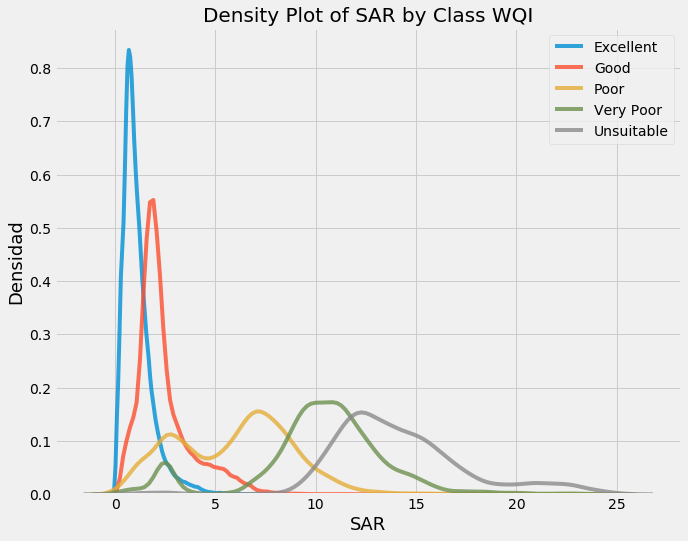

In [35]:
types =  chemical_stations.dropna(subset=['SAR'])
types = types['Class WQI'].value_counts()
types = list(types.index)
# Plot of distribution 
plt.subplots(figsize=(10, 8))
# Plot each sampling point
for b_type in types:
    # Select the class WQI
    subset = chemical_stations[chemical_stations['Class WQI'] == b_type]
    # Density plot of SAR
    sns.kdeplot(subset['SAR'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
# Label the plot
plt.xlabel('SAR', size = 18); plt.ylabel('Densidad', size = 18); 
plt.title('Density Plot of SAR by Class WQI', size = 20);

De manera similar, el SAR tiene una fuerte relación con la clase WQI. Cuanto peor es la calidad del agua, mayor es la SAR y, por tanto, peor es la calidad del agua para el riego agrícola.

## Evolution of WQI, ICI and SAR in South Africa

### Evolution of the WQI

In [10]:
WQI_year=chemical_stations.groupby("YEAR")["WQI"].mean()
WQI_year=WQI_year.to_frame()
WQI_year=WQI_year.reset_index()
WQI_year

,YEAR,WQI
0,1976,79.252166
1,1977,74.883505
2,1978,65.962415
3,1979,68.727268
4,1980,69.695554
5,1981,65.687112
6,1982,73.534339
7,1983,76.727674
8,1984,75.846478
9,1985,66.252855


#### Temporal bias

See which sampling points have the most measurements per year and the mean value of their WQI:

In [37]:
point_more=chemical_stations.groupby(["POINT ID","Locality Description of Sample Station", "YEAR"]).agg(
{"WQI": ["mean"], "POINT ID": "count"})
point_more=point_more.reset_index()
print(point_more.sort_values(by=('POINT ID', 'count'), ascending=False).head(10))
# Eliminate those stations that have less than 30 samples per year
point_more_30=point_more[point_more['POINT ID', 'count']>=30]
# Group by year
point_more_30=point_more_30.groupby("YEAR").agg({('WQI','mean'):"mean"})
point_more_30=point_more_30.reset_index()
print(point_more_30.head())

     POINT ID Locality Description of Sample Station  YEAR        WQI POINT ID
                                                                 mean    count
276     90174        PIENAARS RIVER AT BAVIAANSPOORT  1989  45.391630      342
50      90164          CROCODILE RIVER AT KALKHEUWEL  1991  52.300776      293
4686    90628              VAAL RIVER AT BALKFONTEIN  1984  49.591123      288
49      90164          CROCODILE RIVER AT KALKHEUWEL  1990  56.124216      281
310     90175         HARTBEES SPRUIT AT KAMEELDRIFT  1989  34.217335      269
4685    90628              VAAL RIVER AT BALKFONTEIN  1983  77.352059      269
270     90174        PIENAARS RIVER AT BAVIAANSPOORT  1983  50.894585      269
275     90174        PIENAARS RIVER AT BAVIAANSPOORT  1988  46.084706      265
48      90164          CROCODILE RIVER AT KALKHEUWEL  1989  55.045723      258
4687    90628              VAAL RIVER AT BALKFONTEIN  1985  46.498014      243
   YEAR         WQI
               mean
0  1976  122

#### Spatial bias

Regions that have more than 1000 annual samples:

In [38]:
regions_more=chemical_stations.groupby(['Drainage Region', "YEAR"]).agg(
{"WQI": ["mean"], 'Drainage Region': "count"})
regions_more=regions_more.reset_index()
print(regions_more.sort_values(by=('Drainage Region', 'count'), ascending=False).head())
# Eliminate those regions that have less than 1000 samples per year:
regions_more_1000=regions_more[regions_more["Drainage Region",'count']>=1000]
# Group by year:
regions_more_1000=regions_more_1000.groupby("YEAR").agg({('WQI','mean'):"mean"})
regions_more_1000=regions_more_1000.reset_index()
print(regions_more_1000.head())

   Drainage Region  YEAR        WQI Drainage Region
                               mean           count
93               C  1997  44.490572            3699
95               C  1999  47.017004            3145
92               C  1996  44.798431            3100
94               C  1998  46.807201            3024
85               C  1989  46.569056            2915
   YEAR        WQI
              mean
0  1977  44.749472
1  1978  42.426165
2  1980  47.145116
3  1981  48.450643
4  1982  52.039773


### Evolution of the ICI

In [39]:
ICI_year=chemical_stations.groupby("YEAR")["ICI (%)"].mean()
ICI_year=ICI_year.to_frame()
ICI_year=ICI_year.reset_index()
ICI_year

,YEAR,ICI (%)
0,1976,43.860221
1,1977,48.593794
2,1978,49.320121
3,1979,53.095948
4,1980,54.612812
5,1981,56.252329
6,1982,58.001166
7,1983,59.653588
8,1984,64.231332
9,1985,59.538217


#### Temporal bias

In [40]:
point_more1=chemical_stations.groupby(["POINT ID","Locality Description of Sample Station", "YEAR"]).agg(
{"ICI (%)": ["mean"], "POINT ID": "count"})
point_more1=point_more1.reset_index()
print(point_more1.sort_values(by=('POINT ID', 'count'), ascending=False).head(10))
# Eliminate those stations that have less than 30 samples per year
point_more1_30=point_more1[point_more1['POINT ID', 'count']>=30]
# Group by year:
point_more1_30=point_more1_30.groupby("YEAR").agg({('ICI (%)','mean'):"mean"})
point_more1_30=point_more1_30.reset_index()
print(point_more1_30.head())

     POINT ID Locality Description of Sample Station  YEAR    ICI (%) POINT ID
                                                                 mean    count
276     90174        PIENAARS RIVER AT BAVIAANSPOORT  1989  46.628598      342
50      90164          CROCODILE RIVER AT KALKHEUWEL  1991  64.143386      293
4686    90628              VAAL RIVER AT BALKFONTEIN  1984  68.029360      288
49      90164          CROCODILE RIVER AT KALKHEUWEL  1990  65.126986      281
310     90175         HARTBEES SPRUIT AT KAMEELDRIFT  1989  39.647598      269
4685    90628              VAAL RIVER AT BALKFONTEIN  1983  78.797622      269
270     90174        PIENAARS RIVER AT BAVIAANSPOORT  1983  55.053704      269
275     90174        PIENAARS RIVER AT BAVIAANSPOORT  1988  49.314473      265
48      90164          CROCODILE RIVER AT KALKHEUWEL  1989  60.431027      258
4687    90628              VAAL RIVER AT BALKFONTEIN  1985  67.415246      243
   YEAR    ICI (%)
              mean
0  1976  43.61

#### Spatial bias

In [41]:
regions_more1=chemical_stations.groupby(['Drainage Region', "YEAR"]).agg(
{"ICI (%)": ["mean"], 'Drainage Region': "count"})
regions_more1=regions_more1.reset_index()
print(regions_more1.sort_values(by=('Drainage Region', 'count'), ascending=False).head())
#  Eliminate those stations that have less than 1000 samples per year
regions_more1_1000=regions_more1[regions_more1["Drainage Region",'count']>=1000]
# Group by year:
regions_more1_1000=regions_more1_1000.groupby("YEAR").agg({('ICI (%)','mean'):"mean"})
regions_more1_1000=regions_more1_1000.reset_index()
print(regions_more1_1000.head())

   Drainage Region  YEAR    ICI (%) Drainage Region
                               mean           count
93               C  1997  47.727735            3699
95               C  1999  46.178144            3145
92               C  1996  45.564667            3100
94               C  1998  45.278140            3024
85               C  1989  44.835372            2915
   YEAR    ICI (%)
              mean
0  1977  37.225837
1  1978  42.825298
2  1980  46.269582
3  1981  50.600891
4  1982  51.798007


### Evolution of the SAR

In [47]:
SAR_year=chemical_stations.groupby("YEAR")["SAR"].mean()
SAR_year=SAR_year.to_frame()
SAR_year=SAR_year.reset_index()
SAR_year

,YEAR,SAR
0,1976,3.099560
1,1977,3.132020
2,1978,2.735707
3,1979,2.849145
4,1980,2.818002
5,1981,2.518858
6,1982,2.831784
7,1983,2.991622
8,1984,3.110631
9,1985,2.645523


#### Temporal bias

In [56]:
point_more2=chemical_stations.groupby(["POINT ID","Locality Description of Sample Station", "YEAR"]).agg(
{"SAR": ["mean"], "POINT ID": "count"})
point_more2=point_more2.reset_index()
print(point_more2.sort_values(by=('POINT ID', 'count'), ascending=False).head(10))
# Eliminate those stations that have less than 30 samples per year
point_more2_30=point_more2[point_more2['POINT ID', 'count']>=30]
# Group by year:
point_more2_30=point_more2_30.groupby("YEAR").agg({('SAR','mean'):"mean"})
point_more2_30=point_more2_30.reset_index()
print(point_more2_30)

     POINT ID Locality Description of Sample Station  YEAR       SAR POINT ID
                                                                mean    count
276     90174        PIENAARS RIVER AT BAVIAANSPOORT  1989  1.786624      342
50      90164          CROCODILE RIVER AT KALKHEUWEL  1991  1.820204      293
4686    90628              VAAL RIVER AT BALKFONTEIN  1984  1.426741      288
49      90164          CROCODILE RIVER AT KALKHEUWEL  1990  1.802339      281
310     90175         HARTBEES SPRUIT AT KAMEELDRIFT  1989  0.789329      269
4685    90628              VAAL RIVER AT BALKFONTEIN  1983  1.890743      269
270     90174        PIENAARS RIVER AT BAVIAANSPOORT  1983  2.244749      269
275     90174        PIENAARS RIVER AT BAVIAANSPOORT  1988  1.920187      265
48      90164          CROCODILE RIVER AT KALKHEUWEL  1989  1.630426      258
4687    90628              VAAL RIVER AT BALKFONTEIN  1985  1.332484      243
    YEAR       SAR
              mean
0   1976  4.326673
1   197

#### Spatial bias

In [57]:
regions_more2=chemical_stations.groupby(['Drainage Region', "YEAR"]).agg(
{"SAR": ["mean"], 'Drainage Region': "count"})
regions_more2=regions_more2.reset_index()
print(regions_more2.sort_values(by=('Drainage Region', 'count'), ascending=False).head())
#  Eliminate those stations that have less than 1000 samples per year
regions_more2_1000=regions_more2[regions_more2["Drainage Region",'count']>=1000]
# Group by year:
regions_more2_1000=regions_more2_1000.groupby("YEAR").agg({('SAR','mean'):"mean"})
regions_more2_1000=regions_more2_1000.reset_index()
print(regions_more2_1000)

   Drainage Region  YEAR       SAR Drainage Region
                              mean           count
93               C  1997  1.323860            3699
95               C  1999  1.435408            3145
92               C  1996  1.264773            3100
94               C  1998  1.497844            3024
85               C  1989  1.433956            2915
    YEAR       SAR
              mean
0   1977  1.438773
1   1978  1.322731
2   1980  1.288543
3   1981  1.247955
4   1982  1.351140
5   1983  1.571849
6   1985  1.605362
7   1986  1.519222
8   1987  1.337956
9   1988  1.523487
10  1989  1.430734
11  1990  1.476406
12  1991  1.466618
13  1992  1.445499
14  1993  1.343359
15  1994  1.268286
16  1995  1.310351
17  1996  1.049218
18  1997  1.093317
19  1998  1.242004
20  1999  1.242360
21  2000  1.086112
22  2001  1.098274
23  2002  1.222175
24  2003  1.427868
25  2004  1.437888
26  2005  1.271527
27  2006  1.192485
28  2007  1.437596


### Graphically represent the 3 cases

<Figure size 640x480 with 0 Axes>

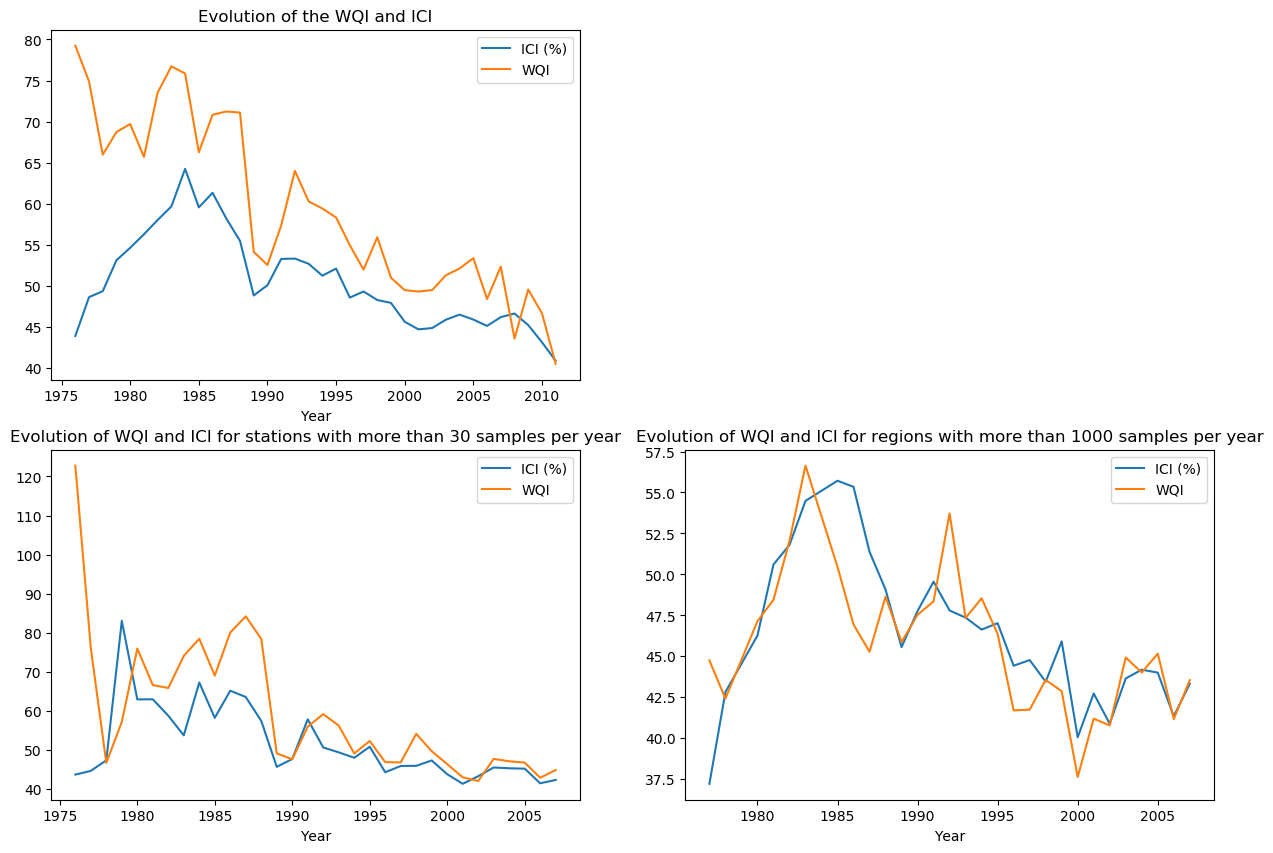

In [53]:
fig = plt.figure()
plt.figure(figsize=(15,10))
plt.style.use('default')

# Evolution of WQI and ICI in South Africa
ax1=plt.subplot2grid((2,2), (0,0))
x1=ICI_year["YEAR"]
y1=ICI_year["ICI (%)"]
ax1=plt.plot(x1,y1)
x1=WQI_year["YEAR"]
y1=WQI_year["WQI"]
ax1=plt.plot(x1,y1)
plt.title("Evolution of the WQI and ICI", size=12)
plt.xlabel("Year", size=10)
plt.legend(["ICI (%)", "WQI"])

# Improving temporal bias
ax2=plt.subplot2grid((2,2), (1,0))
x2=point_more1_30["YEAR"]
y2=point_more1_30[('ICI (%)',  'mean')]
ax2=plt.plot(x2,y2)
x2=point_more_30["YEAR"]
y2=point_more_30[('WQI',  'mean')]
ax2=plt.plot(x2,y2)
plt.xlabel("Year", size=10)
plt.title("Evolution of WQI and ICI for stations with more than 30 samples per year", size=12)
plt.legend(["ICI (%)", "WQI"])

# See if the evolution of the WQI has now changed:
ax3=plt.subplot2grid((2,2), (1,1))
x3=regions_more1_1000["YEAR"]
y3=regions_more1_1000[('ICI (%)',  'mean')]
ax3=plt.plot(x3,y3)
x3=regions_more_1000["YEAR"]
y3=regions_more_1000[('WQI',  'mean')]
ax3=plt.plot(x3,y3)
plt.xlabel("Year", size=10)
plt.title("Evolution of WQI and ICI for regions with more than 1000 samples per year", size=12)
plt.legend(["ICI (%)", "WQI"])

<Figure size 640x480 with 0 Axes>

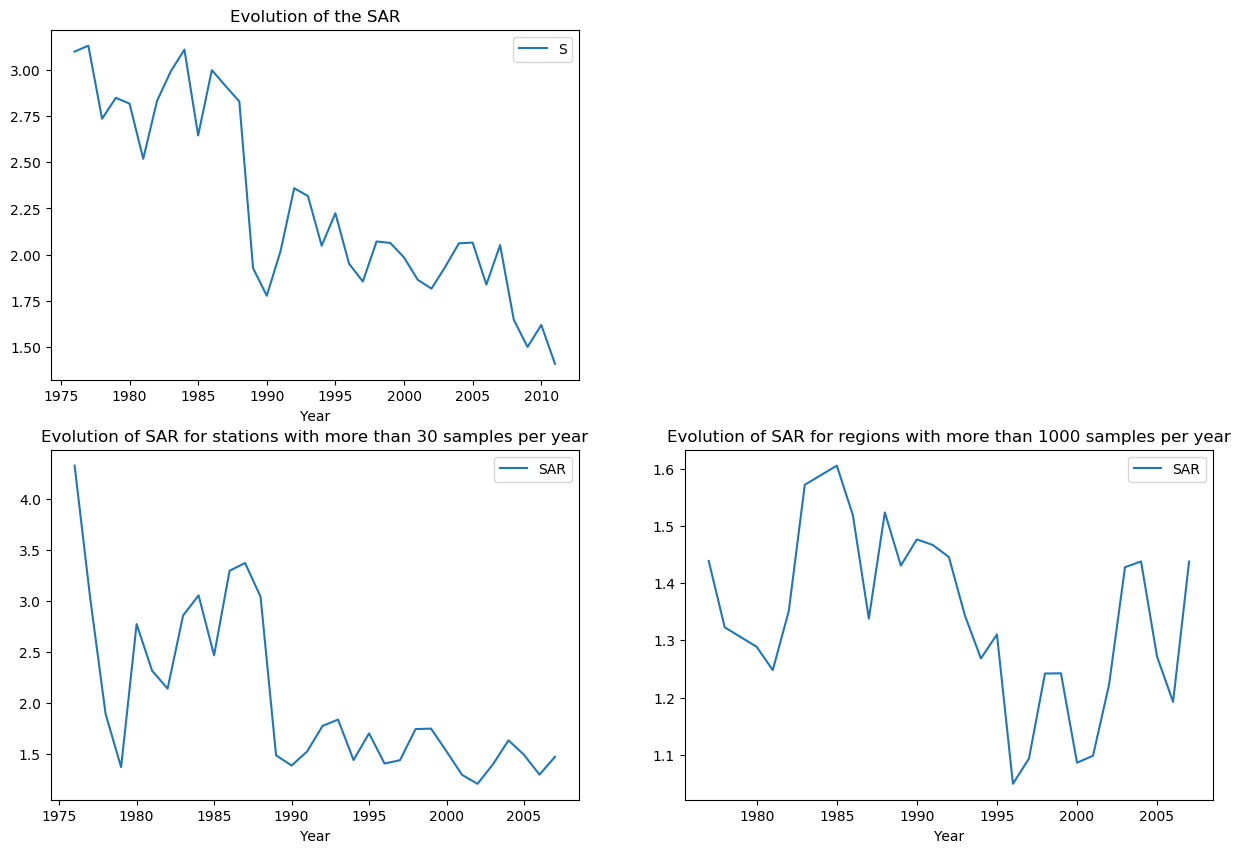

In [60]:
fig = plt.figure()
plt.figure(figsize=(15,10))
plt.style.use('default')

# Evolution of SAR in South Africa
ax1=plt.subplot2grid((2,2), (0,0))
x1=SAR_year["YEAR"]
y1=SAR_year["SAR"]
ax1=plt.plot(x1,y1)
plt.title("Evolution of the SAR", size=12)
plt.xlabel("Year", size=10)
plt.legend("SAR")

# Improving temporal bias
ax2=plt.subplot2grid((2,2), (1,0))
x2=point_more2_30["YEAR"]
y2=point_more2_30[('SAR',  'mean')]
ax2=plt.plot(x2,y2)
plt.xlabel("Year", size=10)
plt.title("Evolution of SAR for stations with more than 30 samples per year", size=12)
plt.legend(["SAR"])

# See if the evolution of the WQI has now changed:
ax3=plt.subplot2grid((2,2), (1,1))
x3=regions_more2_1000["YEAR"]
y3=regions_more2_1000[('SAR',  'mean')]
ax3=plt.plot(x3,y3)
plt.xlabel("Year", size=10)
plt.title("Evolution of SAR for regions with more than 1000 samples per year", size=12)
plt.legend(["SAR"])

### WQI, ICI and SAR Time Series

<Figure size 432x288 with 0 Axes>

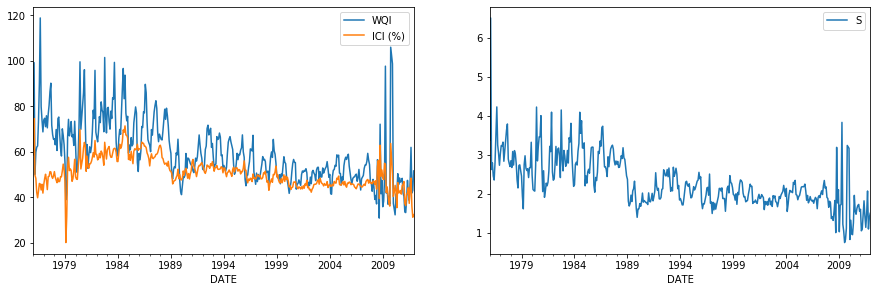

In [8]:
fig = plt.figure()
plt.figure(figsize=(15,10))
plt.style.use('default')
#WQI Time Serie
wqi_temporal=chemical_stations[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_temporal["DATE"]).to_period("M") 
per = wqi_temporal["DATE"].dt.to_period("M")
wqi_temporal = wqi_temporal.groupby(per)["WQI"].mean()

# ICI Time Serie
ici_temporal=chemical_stations[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_temporal["DATE"]).to_period("M") 
per = ici_temporal["DATE"].dt.to_period("M")
ici_temporal = ici_temporal.groupby(per)["ICI (%)"].mean()

# On the same graph
ax1=plt.subplot2grid((2,2), (0,0))
wqi_temporal.plot()
ici_temporal.plot()
plt.legend([ "WQI","ICI (%)"])

# SAR Time Serie
sar_temporal=chemical_stations[["DATE", "SAR"]]
pd.DatetimeIndex(sar_temporal["DATE"]).to_period("M") 
per = sar_temporal["DATE"].dt.to_period("M")
sar_temporal= sar_temporal.groupby(per)["SAR"].mean()

ax2=plt.subplot2grid((2,2), (0,1))
sar_temporal.plot()
plt.legend("SAR")


These graphs seem to show the obvious relationship between the WQI, ICI and SAR.

## Evolution of the WQI, ICI and SAR for the different regions

### Average value of the WQI by Regions

In [11]:
WQI_region=chemical_stations.groupby("Drainage Region")["WQI"].mean()
WQI_region

Drainage Region
A     42.159318
B     43.419853
C     48.246191
D     39.087102
E     32.056175
G    105.177347
H    111.860549
J    115.437419
K     64.818292
L    116.034432
M    130.770641
N    170.699563
P    183.797383
Q    104.092501
R     70.499540
S     41.866566
T     19.790933
U     35.386332
V     49.458774
W     64.851120
X     29.820968
Name: WQI, dtype: float64

### Average value of the ICI by Regions

In [12]:
ICI_region=chemical_stations.groupby("Drainage Region")["ICI (%)"].mean()
ICI_region

Drainage Region
A    43.162837
B    46.066364
C    47.896760
D    28.318849
E    72.788971
G    81.415789
H    81.727835
J    70.304878
K    86.131034
L    83.202396
M    85.220340
N    69.471249
P    83.344128
Q    48.698805
R    58.606293
S    28.798110
T    20.290858
U    52.257872
V    34.725779
W    54.776821
X    36.288157
Name: ICI (%), dtype: float64

### Average value of the SAR by Regions

In [13]:
SAR_region=chemical_stations.groupby("Drainage Region")["SAR"].mean()
SAR_region

Drainage Region
A    1.303437
B    1.019228
C    1.431395
D    1.166144
E    1.959129
G    5.438520
H    5.613119
J    5.524951
K    5.582329
L    5.889126
M    7.671961
N    8.018418
P    8.342139
Q    5.754270
R    4.750632
S    1.598951
T    0.771776
U    3.257773
V    3.185040
W    3.041388
X    1.083856
Name: SAR, dtype: float64

In [15]:
# Number of regions
print("There are",len(chemical_stations["Drainage Region"].unique()), "different regions") 

There are 21 different regions


In [16]:
# Regions ordered from highest to lowest number of measurements
regions=chemical_stations.groupby("Drainage Region")["Drainage Region"].count()
regions.sort_values(ascending=False)

Drainage Region
C    69674
A    46964
B    25056
H     8544
D     7536
G     7496
Q     6817
J     4832
X     3020
W     2905
R     2572
N     2458
S     1642
P     1639
L     1585
K     1464
V     1340
U      523
E      424
M      345
T      299
Name: Drainage Region, dtype: int64

### Evolution of the 7 regions with the most measures

In [20]:
# Region A
region_A=chemical_stations[chemical_stations["Drainage Region"]=="A"]
#WQI
wqi_A=region_A[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_A["DATE"]).to_period("M") 
per = wqi_A["DATE"].dt.to_period("M")
wqi_A = wqi_A.groupby(per)["WQI"].mean()
#ICI
ici_A=region_A[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_A["DATE"]).to_period("M") 
per = ici_A["DATE"].dt.to_period("M")
ici_A = ici_A.groupby(per)["ICI (%)"].mean()
#SAR
sar_A=region_A[["DATE", "SAR"]]
pd.DatetimeIndex(sar_A["DATE"]).to_period("M") 
per = sar_A["DATE"].dt.to_period("M")
sar_A = sar_A.groupby(per)["SAR"].mean()

# Region B
region_B=chemical_stations[chemical_stations["Drainage Region"]=="B"]
#WQI
wqi_B=region_B[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_B["DATE"]).to_period("M") 
per = wqi_B["DATE"].dt.to_period("M")
wqi_B = wqi_B.groupby(per)["WQI"].mean()
#ICI
ici_B=region_B[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_B["DATE"]).to_period("M") 
per = ici_B["DATE"].dt.to_period("M")
ici_B = ici_B.groupby(per)["ICI (%)"].mean()
#SAR
sar_B=region_B[["DATE", "SAR"]]
pd.DatetimeIndex(sar_B["DATE"]).to_period("M") 
per = sar_B["DATE"].dt.to_period("M")
sar_B = sar_B.groupby(per)["SAR"].mean()

# Region C
region_C=chemical_stations[chemical_stations["Drainage Region"]=="C"]
#WQI
wqi_C=region_C[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_C["DATE"]).to_period("M") 
per = wqi_C["DATE"].dt.to_period("M")
wqi_C = wqi_C.groupby(per)["WQI"].mean()
#ICI
ici_C=region_C[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_C["DATE"]).to_period("M") 
per = ici_C["DATE"].dt.to_period("M")
ici_C = ici_C.groupby(per)["ICI (%)"].mean()
#SAR
sar_C=region_C[["DATE", "SAR"]]
pd.DatetimeIndex(sar_C["DATE"]).to_period("M") 
per = sar_C["DATE"].dt.to_period("M")
sar_C = sar_C.groupby(per)["SAR"].mean()

# Region D
region_D=chemical_stations[chemical_stations["Drainage Region"]=="D"]
#WQI
wqi_D=region_D[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_D["DATE"]).to_period("M") 
per = wqi_D["DATE"].dt.to_period("M")
wqi_D = wqi_D.groupby(per)["WQI"].mean()
#ICI
ici_D=region_D[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_D["DATE"]).to_period("M") 
per = ici_D["DATE"].dt.to_period("M")
ici_D = ici_D.groupby(per)["ICI (%)"].mean()
#SAR
sar_D=region_D[["DATE", "SAR"]]
pd.DatetimeIndex(sar_D["DATE"]).to_period("M") 
per = sar_D["DATE"].dt.to_period("M")
sar_D = sar_D.groupby(per)["SAR"].mean()

# Region G
region_G=chemical_stations[chemical_stations["Drainage Region"]=="G"]
#WQI
wqi_G=region_G[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_G["DATE"]).to_period("M") 
per = wqi_G["DATE"].dt.to_period("M")
wqi_G = wqi_G.groupby(per)["WQI"].mean()
#ICI
ici_G=region_G[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_G["DATE"]).to_period("M") 
per = ici_G["DATE"].dt.to_period("M")
ici_G = ici_G.groupby(per)["ICI (%)"].mean()
#SAR
sar_G=region_G[["DATE", "SAR"]]
pd.DatetimeIndex(sar_G["DATE"]).to_period("M") 
per = sar_G["DATE"].dt.to_period("M")
sar_G = sar_G.groupby(per)["SAR"].mean()

# Region H
region_H=chemical_stations[chemical_stations["Drainage Region"]=="H"]
#WQI
wqi_H=region_H[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_H["DATE"]).to_period("M") 
per = wqi_H["DATE"].dt.to_period("M")
wqi_H = wqi_H.groupby(per)["WQI"].mean()
#ICI
ici_H=region_H[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_H["DATE"]).to_period("M") 
per = ici_H["DATE"].dt.to_period("M")
ici_H = ici_H.groupby(per)["ICI (%)"].mean()
#SAR
sar_H=region_H[["DATE", "SAR"]]
pd.DatetimeIndex(sar_H["DATE"]).to_period("M") 
per = sar_H["DATE"].dt.to_period("M")
sar_H= sar_H.groupby(per)["SAR"].mean()


# Region Q
region_Q=chemical_stations[chemical_stations["Drainage Region"]=="Q"]
#WQI
wqi_Q=region_Q[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_Q["DATE"]).to_period("M") 
per = wqi_Q["DATE"].dt.to_period("M")
wqi_Q = wqi_Q.groupby(per)["WQI"].mean()
#ICI
ici_Q=region_Q[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_Q["DATE"]).to_period("M") 
per = ici_Q["DATE"].dt.to_period("M")
ici_Q = ici_Q.groupby(per)["ICI (%)"].mean()
#SAR
sar_Q=region_Q[["DATE", "SAR"]]
pd.DatetimeIndex(sar_Q["DATE"]).to_period("M") 
per = sar_Q["DATE"].dt.to_period("M")
sar_Q= sar_Q.groupby(per)["SAR"].mean()

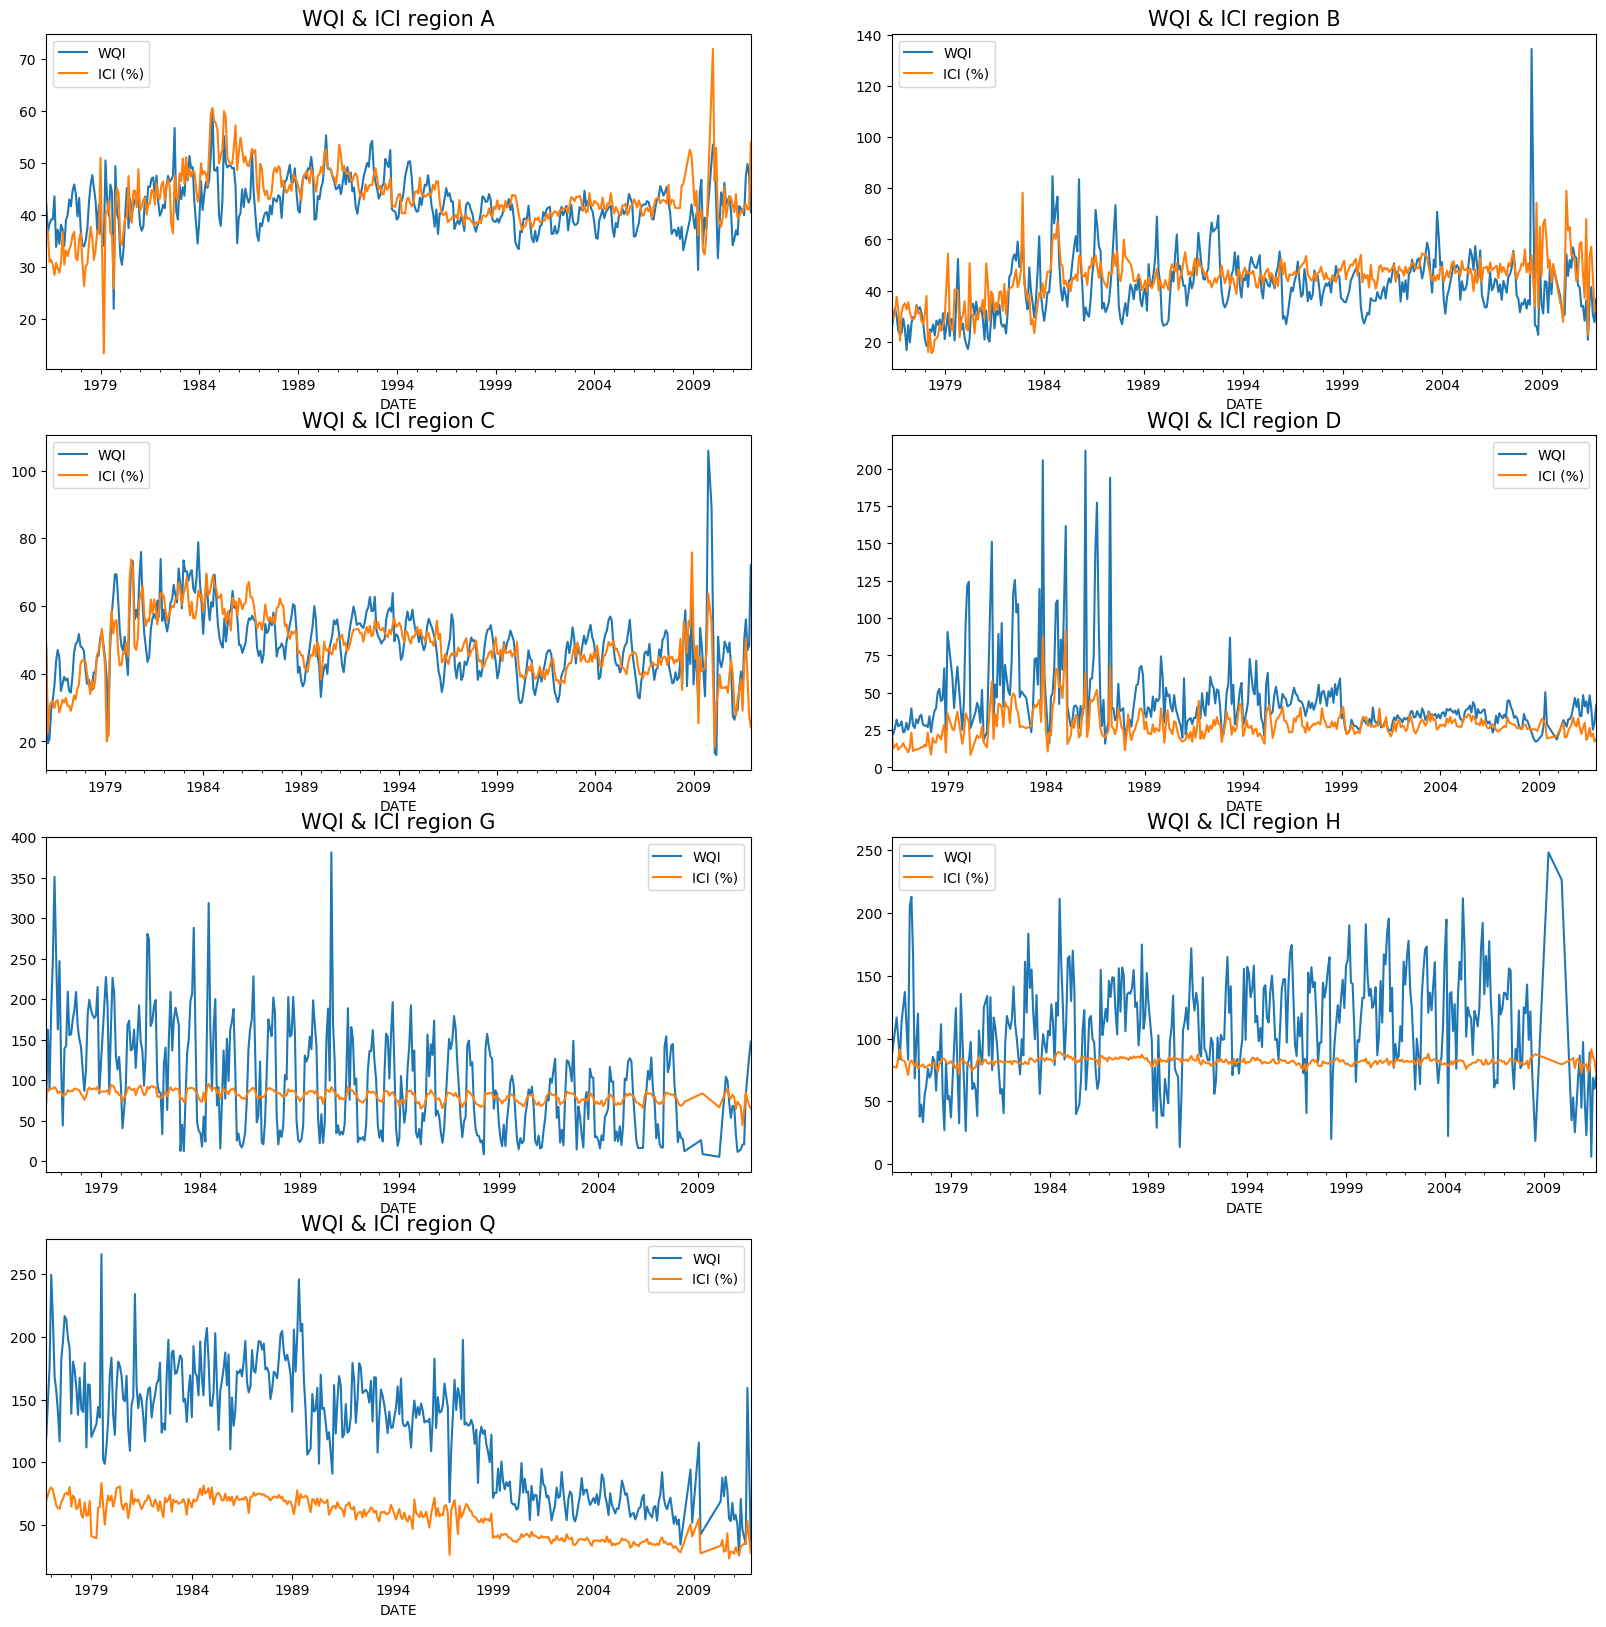

In [24]:
plt.figure(figsize=(20,20))
plt.style.use('default')

plt.subplot2grid((4,2), (0,0))
wqi_A.plot()
ici_A.plot()
plt.title("WQI & ICI region A", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((4,2), (0,1))
wqi_B.plot()
ici_B.plot()
plt.title("WQI & ICI region B", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((4,2), (1,0))
wqi_C.plot()
ici_C.plot()
plt.title("WQI & ICI region C", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((4,2), (1,1))
wqi_D.plot()
ici_D.plot()
plt.title("WQI & ICI region D", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((4,2), (2,0))
wqi_G.plot()
ici_G.plot()
plt.title("WQI & ICI region G", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((4,2), (2,1))
wqi_H.plot()
ici_H.plot()
plt.title("WQI & ICI region H", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((4,2), (3,0))
wqi_Q.plot()
ici_Q.plot()
plt.title("WQI & ICI region Q", size=15)
plt.legend([ "WQI","ICI (%)"])

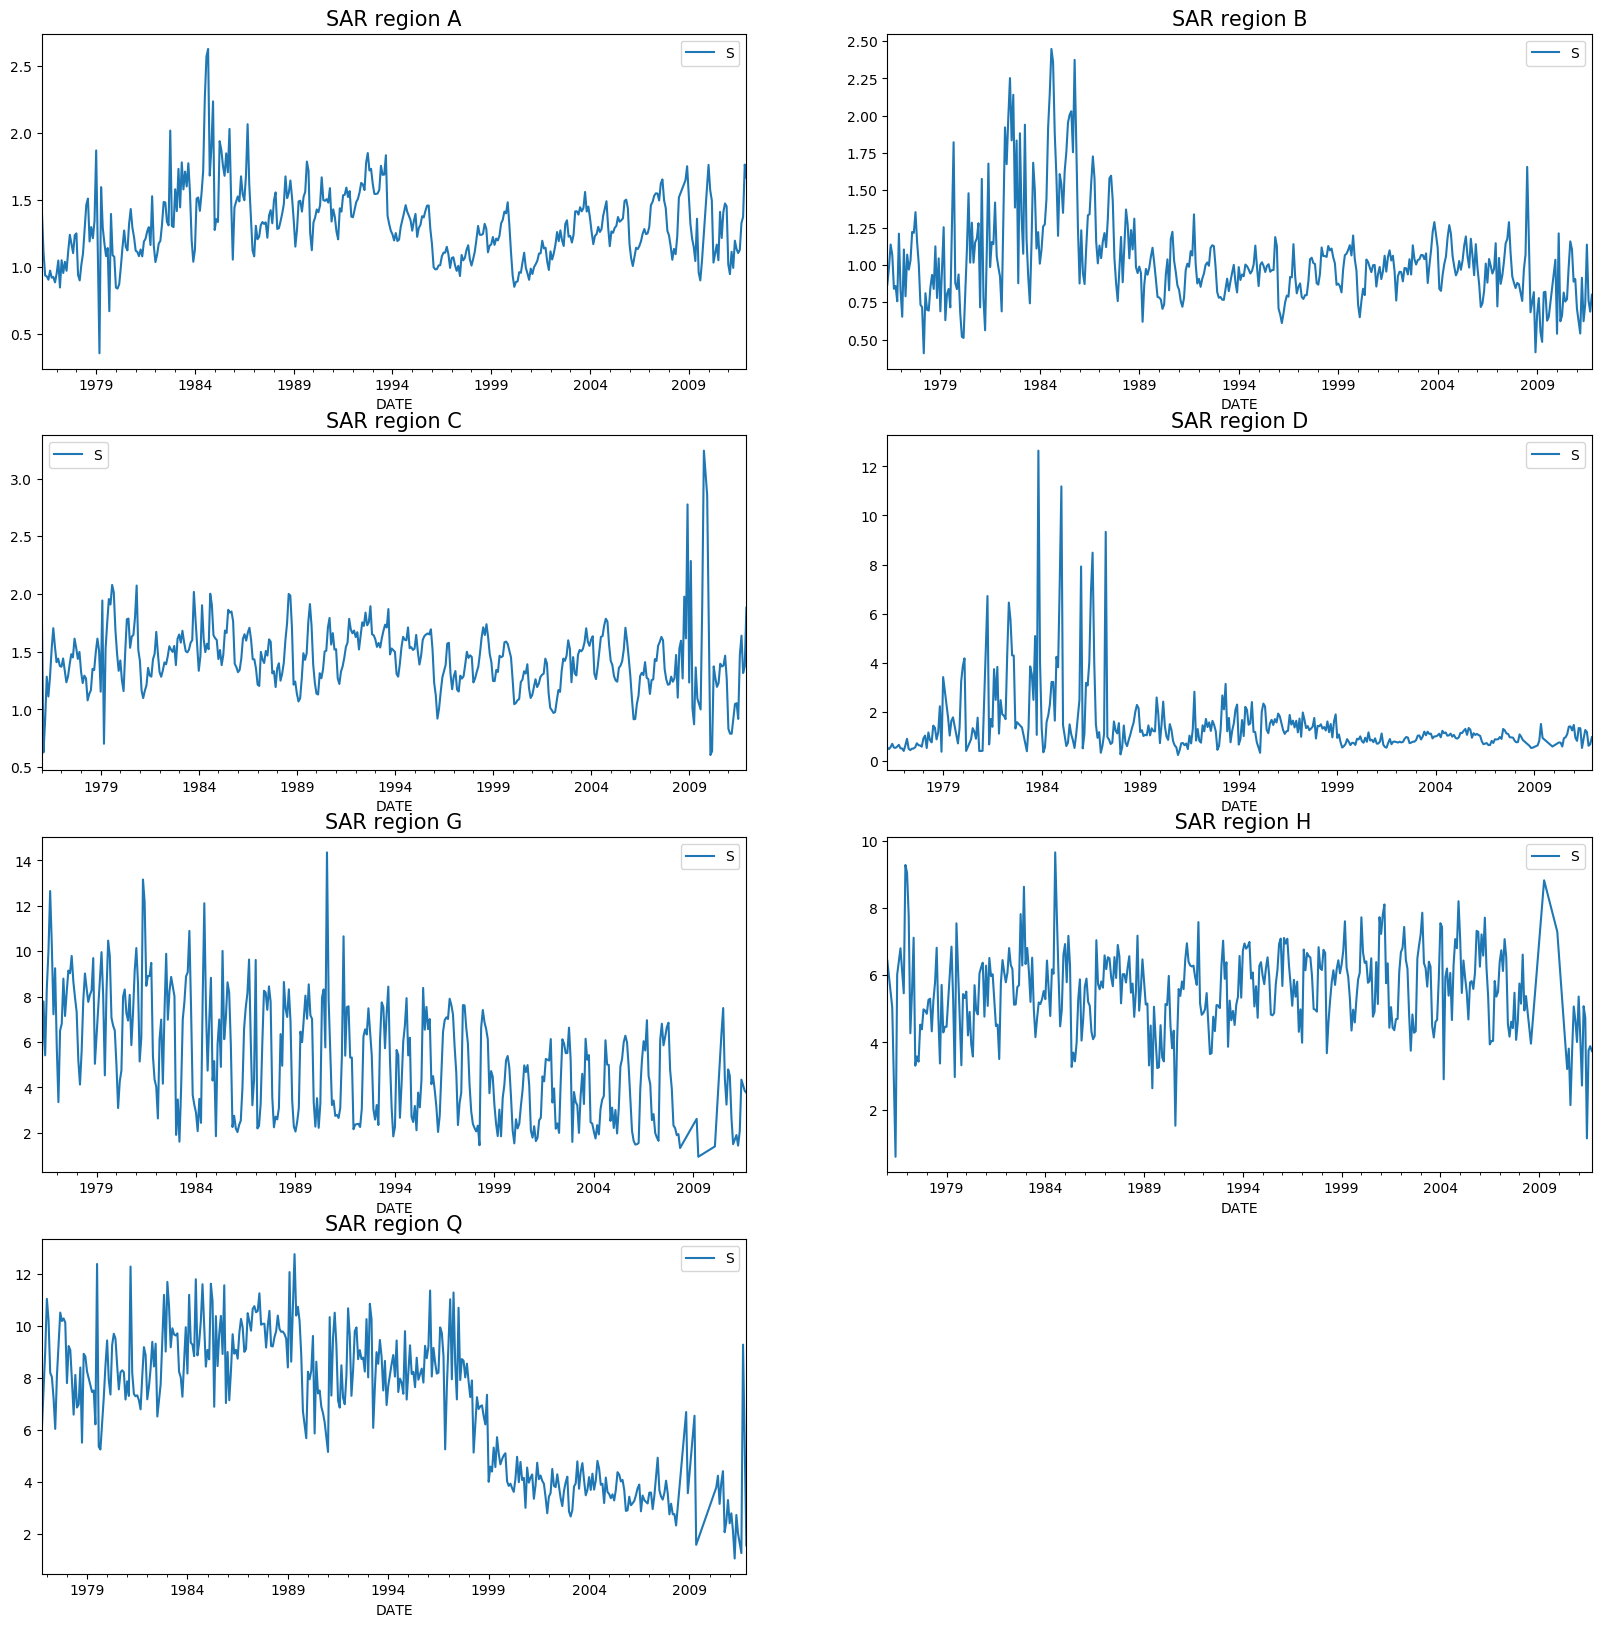

In [26]:
plt.figure(figsize=(20,20))
plt.style.use('default')

plt.subplot2grid((4,2), (0,0))
sar_A.plot()
plt.title("SAR region A", size=15)
plt.legend("SAR")

plt.subplot2grid((4,2), (0,1))
sar_B.plot()
plt.title("SAR region B", size=15)
plt.legend("SAR")

plt.subplot2grid((4,2), (1,0))
sar_C.plot()
plt.title("SAR region C", size=15)
plt.legend("SAR")

plt.subplot2grid((4,2), (1,1))
sar_D.plot()
plt.title("SAR region D", size=15)
plt.legend("SAR")

plt.subplot2grid((4,2), (2,0))
sar_G.plot()
plt.title("SAR region G", size=15)
plt.legend("SAR")

plt.subplot2grid((4,2), (2,1))
sar_H.plot()
plt.title(" SAR region H", size=15)
plt.legend("SAR")

plt.subplot2grid((4,2), (3,0))
sar_Q.plot()
plt.title("SAR region Q", size=15)
plt.legend("SAR")

These graphs confirm what we already suspected, the obvious relationship between the WQI, the ICI and the SAR.

## Stations with the worst water quality indices

See which stations with more than 30 annual samples have the worst WQI:

In [27]:
worst_wqi=chemical_stations.groupby(["Drainage Region","Latitude (degrees)", "Longitude (degrees)", "Locality Description of Sample Station", "YEAR"]).agg({"WQI": ["mean"], 
                                                                                   "Locality Description of Sample Station": "count"})
worst_wqi=worst_wqi.reset_index()
worst_wqi.head()

,Drainage Region,Latitude (degrees),Longitude (degrees),Locality Description of Sample Station,YEAR,WQI,Locality Description of Sample Station
,,,,,,mean,count
0,A,-26.1494,27.5947,BRANDVLEI RIVER AT BRANDVLEI,1999,48.327034,4
1,A,-26.0681,27.9728,LITTLE JUKSKEI RIVER AT KLIPFONTEIN/RANDBURG,1979,29.353541,15
2,A,-26.0681,27.9728,LITTLE JUKSKEI RIVER AT KLIPFONTEIN/RANDBURG,1980,29.524538,14
3,A,-26.0681,27.9728,LITTLE JUKSKEI RIVER AT KLIPFONTEIN/RANDBURG,1981,32.036868,10
4,A,-26.0681,27.9728,LITTLE JUKSKEI RIVER AT KLIPFONTEIN/RANDBURG,1982,30.447198,9


In [28]:
worst_wqi.columns

MultiIndex([(                       'Drainage Region',      ''),
            (                    'Latitude (degrees)',      ''),
            (                   'Longitude (degrees)',      ''),
            ('Locality Description of Sample Station',      ''),
            (                                  'YEAR',      ''),
            (                                   'WQI',  'mean'),
            ('Locality Description of Sample Station', 'count')],
           )

In [29]:
#Remove whitespace from column names:
worst_wqi.columns = [' '.join(col).strip() for col in worst_wqi.columns.values]
worst_wqi.columns

Index(['Drainage Region', 'Latitude (degrees)', 'Longitude (degrees)',
       'Locality Description of Sample Station', 'YEAR', 'WQI mean',
       'Locality Description of Sample Station count'],
      dtype='object')

In [30]:
# Delete those stations that have less than 30 samples:
worst_wqi=worst_wqi[(worst_wqi['Locality Description of Sample Station count']>=30)]
worst_wqi.sort_values(by='Locality Description of Sample Station').head(10)

,Drainage Region,Latitude (degrees),Longitude (degrees),Locality Description of Sample Station,YEAR,WQI mean,Locality Description of Sample Station count
4610,C,-28.2878,27.1458,ALLEMANSKRAAL DAM ON SAND RIVER: NEAR DAM WALL,1994,26.306365,37
4611,C,-28.2878,27.1458,ALLEMANSKRAAL DAM ON SAND RIVER: NEAR DAM WALL,1995,29.381325,31
4609,C,-28.2878,27.1458,ALLEMANSKRAAL DAM ON SAND RIVER: NEAR DAM WALL,1993,24.630346,40
1328,A,-25.4058,28.2783,APIES RIVER AT HAMMANSKRAAL,1977,59.761962,40
1285,A,-25.4667,28.2636,APIES RIVER AT RONDAVEL,1987,68.236721,46
1295,A,-25.4667,28.2636,APIES RIVER AT RONDAVEL,1997,53.094700,50
1294,A,-25.4667,28.2636,APIES RIVER AT RONDAVEL,1996,56.665717,51
1296,A,-25.4667,28.2636,APIES RIVER AT RONDAVEL,1998,52.110952,48
1299,A,-25.4667,28.2636,APIES RIVER AT RONDAVEL,2001,50.768042,52
1284,A,-25.4667,28.2636,APIES RIVER AT RONDAVEL,1986,69.966344,34


In [31]:
# List of stations with the worst water quality indices
worst_wqi.groupby(["Drainage Region","Latitude (degrees)", "Longitude (degrees)",
                   "Locality Description of Sample Station"])["WQI mean"].mean().sort_values(ascending=False).head(10)

Drainage Region  Latitude (degrees)  Longitude (degrees)  Locality Description of Sample Station    
N                -33.5125            25.6592              COERNEY RIVER AT SELBORNE/CARLTON             440.374365
G                -33.0661            18.7597              MOORREESBURG SPRUIT AT HOLLE RIVER            375.438769
J                -33.7500            21.4447              GROOT RIVER AT BUFFELSFONTEIN/VAN WYKSDORP    327.967940
                 -33.9806            21.6533              GOURITS RIVER AT ZEEKOEDRIFT/DIE POORT        315.172153
B                -24.0356            31.1289              GA-SELATI RIVER AT LOOLE/FOSKOR               264.128700
G                -32.6014            19.7506              KRUIS RIVER AT TWEEKUILEN/EENDEKUIL           262.250330
L                -33.0456            24.3333              HEUNINGKLIP RIVER AT KLIPPLAAT OUTSPAN        260.052408
N                -33.5814            25.6744              SUNDAYS RIV AT ADDO DRIFT EAST/ADDO 

### Temporal evolution for the stations with the worst water quality indices

In [32]:
# Coerney station in the N region
Coerney_station=chemical_stations[chemical_stations["Locality Description of Sample Station"]=="COERNEY RIVER AT SELBORNE/CARLTON"]
#WQI
wqi_Coerney=Coerney_station[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_Coerney["DATE"]).to_period("M") 
per = wqi_Coerney["DATE"].dt.to_period("M")
wqi_Coerney = wqi_Coerney.groupby(per)["WQI"].mean()
#ICI
ici_Coerney=Coerney_station[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_Coerney["DATE"]).to_period("M") 
per = ici_Coerney["DATE"].dt.to_period("M")
ici_Coerney = ici_Coerney.groupby(per)["ICI (%)"].mean()

# Moorreesburg station in the G region
Moorreesburg_station=chemical_stations[chemical_stations["Locality Description of Sample Station"]=="MOORREESBURG SPRUIT AT HOLLE RIVER"]
#WQI
wqi_Moorreesburg=Moorreesburg_station[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_Moorreesburg["DATE"]).to_period("M") 
per = wqi_Moorreesburg["DATE"].dt.to_period("M")
wqi_Moorreesburg = wqi_Moorreesburg.groupby(per)["WQI"].mean()
#ICI
ici_Moorreesburg=Moorreesburg_station[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_Moorreesburg["DATE"]).to_period("M") 
per = ici_Moorreesburg["DATE"].dt.to_period("M")
ici_Moorreesburg = ici_Moorreesburg.groupby(per)["ICI (%)"].mean()

# Groot station in the J region
Groot_station=chemical_stations[chemical_stations["Locality Description of Sample Station"]=="GROOT RIVER AT BUFFELSFONTEIN/VAN WYKSDORP"]
#WQI
wqi_Groot=Groot_station[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_Groot["DATE"]).to_period("M") 
per = wqi_Groot["DATE"].dt.to_period("M")
wqi_Groot = wqi_Groot.groupby(per)["WQI"].mean()
#ICI
ici_Groot=Groot_station[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_Groot["DATE"]).to_period("M") 
per = ici_Groot["DATE"].dt.to_period("M")
ici_Groot= ici_Groot.groupby(per)["ICI (%)"].mean()

# Gourits station in the J region
Gourits_station=chemical_stations[chemical_stations["Locality Description of Sample Station"]=="GOURITS RIVER AT ZEEKOEDRIFT/DIE POORT"]
#WQI
wqi_Gourits=Gourits_station[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_Gourits["DATE"]).to_period("M") 
per = wqi_Gourits["DATE"].dt.to_period("M")
wqi_Gourits = wqi_Gourits.groupby(per)["WQI"].mean()
#ICI
ici_Gourits=Gourits_station[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_Gourits["DATE"]).to_period("M") 
per = ici_Gourits["DATE"].dt.to_period("M")
ici_Gourits= ici_Gourits.groupby(per)["ICI (%)"].mean()

# Gaselati station in the B region
Gaselati_station=chemical_stations[chemical_stations["Locality Description of Sample Station"]=="GA-SELATI RIVER AT LOOLE/FOSKOR"]
#WQI
wqi_Gaselati=Gaselati_station[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_Gaselati["DATE"]).to_period("M") 
per = wqi_Gaselati["DATE"].dt.to_period("M")
wqi_Gaselati = wqi_Gaselati.groupby(per)["WQI"].mean()
#ICI
ici_Gaselati=Gaselati_station[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_Gaselati["DATE"]).to_period("M") 
per = ici_Gaselati["DATE"].dt.to_period("M")
ici_Gaselati= ici_Gaselati.groupby(per)["ICI (%)"].mean()

# Kruis station in the J region
Kruis_station=chemical_stations[chemical_stations["Locality Description of Sample Station"]=="KRUIS RIVER AT TWEEKUILEN/EENDEKUIL"]
#WQI
wqi_Kruis=Kruis_station[["DATE", "WQI"]]
pd.DatetimeIndex(wqi_Kruis["DATE"]).to_period("M") 
per = wqi_Kruis["DATE"].dt.to_period("M")
wqi_Kruis = wqi_Kruis.groupby(per)["WQI"].mean()
#ICI
ici_Kruis=Kruis_station[["DATE", "ICI (%)"]]
pd.DatetimeIndex(ici_Kruis["DATE"]).to_period("M") 
per = ici_Kruis["DATE"].dt.to_period("M")
ici_Kruis= ici_Kruis.groupby(per)["ICI (%)"].mean()

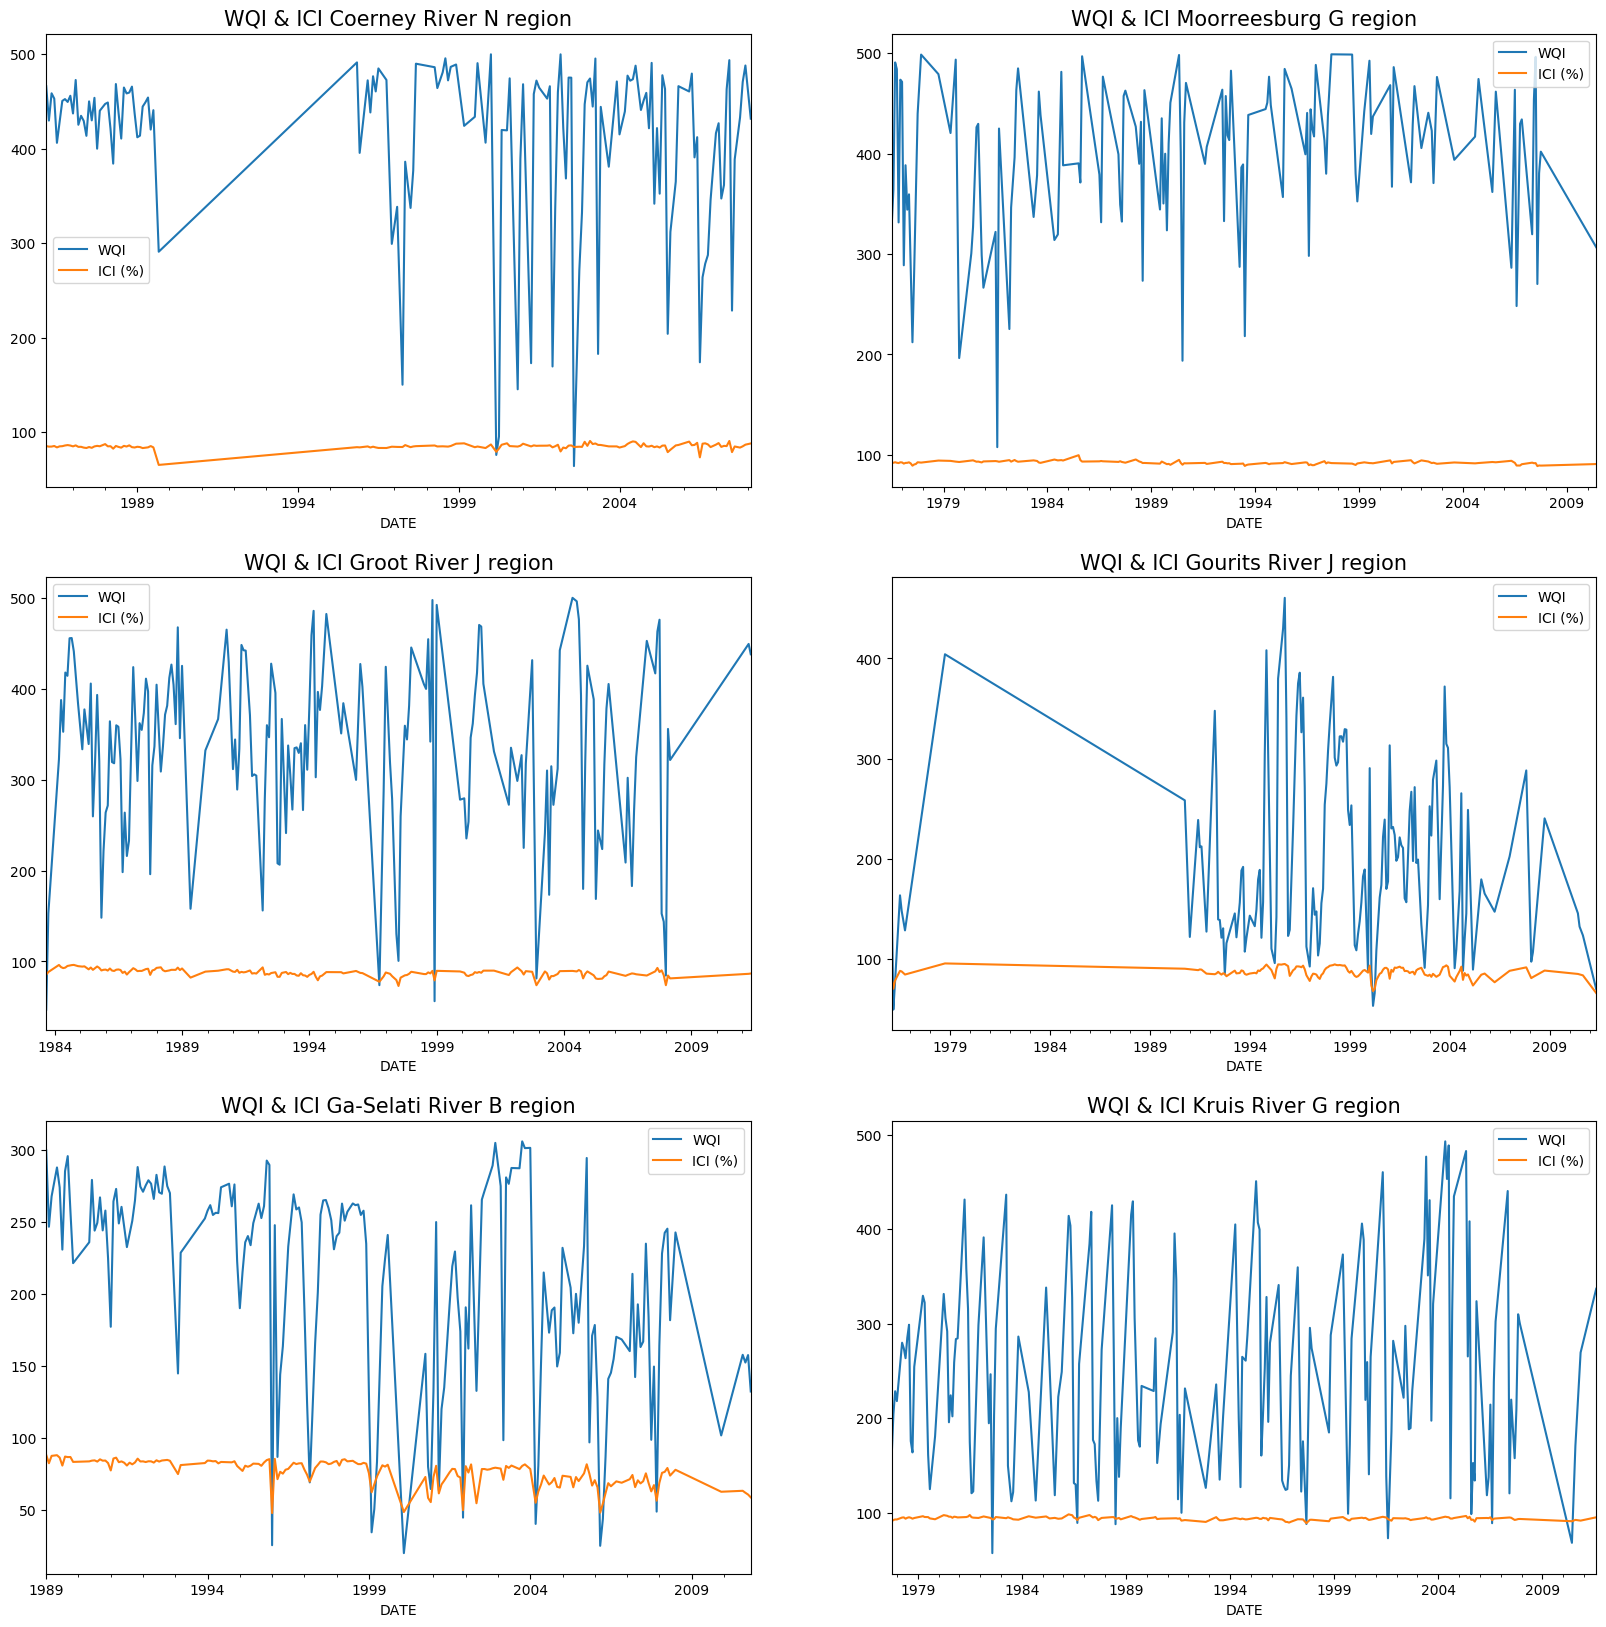

In [33]:
plt.figure(figsize=(20,20))
plt.style.use('default')

plt.subplot2grid((3,2), (0,0))
wqi_Coerney.plot()
ici_Coerney .plot()
plt.title("WQI & ICI Coerney River N region", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((3,2), (0,1))
wqi_Moorreesburg .plot()
ici_Moorreesburg .plot()
plt.title("WQI & ICI Moorreesburg G region", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((3,2), (1,0))
wqi_Groot.plot()
ici_Groot.plot()
plt.title("WQI & ICI Groot River J region", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((3,2), (1,1))
wqi_Gourits.plot()
ici_Gourits.plot()
plt.title("WQI & ICI Gourits River J region", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((3,2), (2,0))
wqi_Gaselati.plot()
ici_Gaselati.plot()
plt.title("WQI & ICI Ga-Selati River B region", size=15)
plt.legend([ "WQI","ICI (%)"])

plt.subplot2grid((3,2), (2,1))
wqi_Kruis.plot()
ici_Kruis.plot()
plt.title("WQI & ICI Kruis River G region", size=15)
plt.legend([ "WQI","ICI (%)"])


The temporal evolutions of the WQI in these stations are very uneven, they do not follow any trend. However, it is observed that the ICI value is quite constant in all of them and is close to 100.